In [1]:
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

In [2]:
# load data
df = pd.read_csv('./Data_income/clean_data',index_col=0)
df.head(3)

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,5,77516.0,13.0,7,4,1,2174.0,0.0,40.0,...,0,1,0,0,0,1,0,0,0,0
1,50,6,83311.0,13.0,15,4,1,0.0,0.0,13.0,...,0,0,0,0,1,0,0,0,0,0
2,38,4,215646.0,9.0,3,4,1,0.0,0.0,40.0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'occupation', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'Y', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife'],
      dtype='object')

In [4]:
corr_matrix = df.corr()
print(corr_matrix["Y"].sort_values(ascending=False))

Y                                        1.000000
marital-status_ Married-civ-spouse       0.445853
relationship_ Husband                    0.403791
occupation                               0.344212
education-num                            0.332613
age                                      0.230369
hours-per-week                           0.227687
capital-gain                             0.223013
sex                                      0.214628
workclass                                0.170452
capital-loss                             0.147554
relationship_ Wife                       0.120484
race                                     0.096204
native-country                           0.094950
marital-status_ Married-AF-spouse        0.008977
fnlwgt                                  -0.006339
marital-status_ Married-spouse-absent   -0.039303
marital-status_ Widowed                 -0.065050
marital-status_ Separated               -0.073583
relationship_ Other-relative            -0.085601


In [5]:
lst1 = list(df.columns)
lst1.remove('Y')
lst11 = lst1[0:14]

# Separate out the target

In [6]:
X = df[lst11]
y = df['Y']
X.head(3)

,age,workclass,fnlwgt,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse
0,39,5,77516.0,13.0,7,4,1,2174.0,0.0,40.0,23,0,0,0
1,50,6,83311.0,13.0,15,4,1,0.0,0.0,13.0,23,0,0,1
2,38,4,215646.0,9.0,3,4,1,0.0,0.0,40.0,23,1,0,0


In [7]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Import module for fitting
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier()
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
dtreemodel.classes_

array([0, 1])

In [10]:
lst2 = (list(dtreemodel.feature_importances_))
lst2
dict1 = dict(zip(lst1,lst2))
print(dict1)

{'age': 0.11628543503624934, 'workclass': 0.034252077210134436, 'fnlwgt': 0.2109568469083556, 'education-num': 0.12132772883764431, 'occupation': 0.0636260048170409, 'race': 0.01190715802726384, 'sex': 0.012113089999063022, 'capital-gain': 0.10542546372466827, 'capital-loss': 0.038543219077449196, 'hours-per-week': 0.06731671931690965, 'native-country': 0.015338813051068722, 'marital-status_ Divorced': 0.003379438344336548, 'marital-status_ Married-AF-spouse': 0.0006181820622695959, 'marital-status_ Married-civ-spouse': 0.1989098235875466}


In [11]:
lst2

[0.11628543503624934,
 0.034252077210134436,
 0.2109568469083556,
 0.12132772883764431,
 0.0636260048170409,
 0.01190715802726384,
 0.012113089999063022,
 0.10542546372466827,
 0.038543219077449196,
 0.06731671931690965,
 0.015338813051068722,
 0.003379438344336548,
 0.0006181820622695959,
 0.1989098235875466]

In [12]:
predictions = dtreemodel.predict(X_test)

In [13]:
dtreemodel.score(X_test, y_test)

0.8110284583361769

In [14]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 15))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

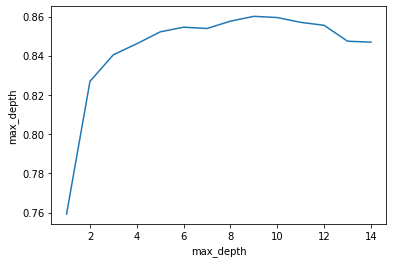

In [15]:
plt.xlabel("max_depth")
plt.ylabel("max_depth")
plt.plot(max_depth_range,accuracy)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtreemodel = DecisionTreeClassifier(max_depth=8)
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel.fit(X_train, y_train)

predictions = dtreemodel.predict(X_test)
print(f"{accuracy_score(y_test, predictions)}")


0.857503582884051


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11125
           1       0.74      0.63      0.68      3528

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653



In [18]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[2234, 794]
[1294, 10331]


In [19]:
error = (fp+fn)/(fp+fn+tp+tn)
error

0.14249641711594896

#  maximum depth at 8 gives the best error (0.13997133692759162)
#  with DecisionTreeClassifier

# tp[2089, 596]fp

# fn[1455, 10513]tn

#  features reduced to 13 from 25 did not make huge difference in performance of the model with max depth still being 8 with error (0.1408585272640415)

#  [2080, 631]
#  [1433, 10509]

